<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
diagnosis                  0
dtype: int64
                         mean radius  mean texture  mean perimeter  mean area  \
mean ra

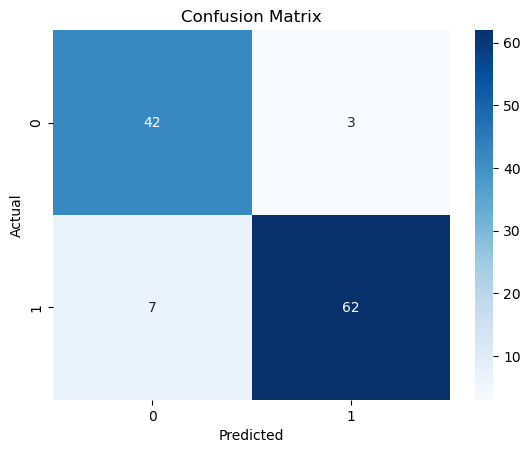

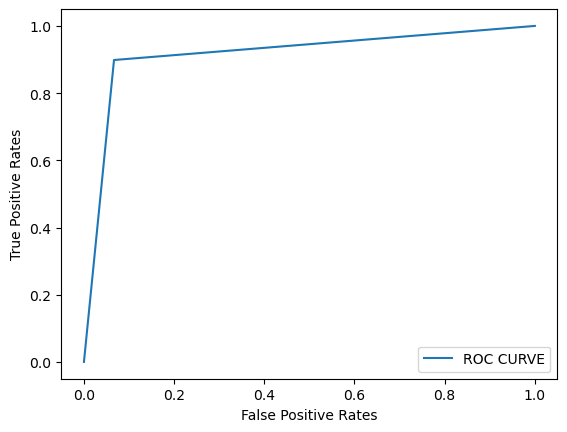

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve
import seaborn as sns

# create data
data = load_breast_cancer()

df = pd.DataFrame(data.data, columns = data.feature_names)

df.info()

df['diagnosis'] = data.target

display(df)

df['diagnosis'] = df['diagnosis'].astype(int)

# now check for any missing values
print(df.isnull().sum())

# create correlation matrix
corr_matrix = df.corr()
print(corr_matrix)

corr_with_target = corr_matrix['diagnosis'].sort_values(ascending = False)
print(corr_with_target)

threshold = 0.25
corr_features = corr_with_target[abs(corr_with_target) > threshold].index
print(f'Selected features : {corr_features}')

cols = df.columns.tolist()

print(cols)

# if our cols has id in it we need to remove it here
for col in cols:
    if col not in corr_features:
        df = df.drop(col, axis = 1)
        # to remove as a col we use axis = 1 for row it is axis = 0

df.head()

# now split the data and choose X and y
X = df.iloc[ : , 0:-1]
Y = df.iloc[ : , -1]
Y = Y.values
X = X.values

print(X)
print(Y)

# split the dataset
X_train, X_test, Y_train, Y_test = tts(X, Y, random_state = 104, test_size = 0.20, shuffle = True)

X_train.shape

# now reshape them 
np.reshape(Y_train, (X_train.shape[0], 1))
np.reshape(Y_test, (X_test.shape[0], 1))

# decision tree implementation
def giniIndex(y):
    classes, counts = np.unique(y, return_counts = True)
    gini_impurity = 1
    for count in counts:
        propability = count / len(y)
        gini_impurity -= propability ** 2
    return gini_impurity

# splitting mechanism
def split(X, Y, limit, feature_index):
    left_side = X[ : , feature_index] <= limit
    right_side = X[ : , feature_index] > limit

    return X[left_side], X[right_side], Y[left_side], Y[right_side]

# define the best split based on Gini Index
def find_best_split(X, Y):
    best_gini = float('inf')
    best_split = None
    features = X.shape[1] # no.of columns
    for feature in range(features):
        limits = np.unique(X[ : , feature])
        for limit in limits:
            X_left, X_right, Y_left, Y_right = split(X, Y, limit, feature)

            if len(Y_left) == 0 or len(Y_right) == 0:
                continue
            giniLeft = giniIndex(Y_left)
            giniRight = giniIndex(Y_right)
            num = len(Y_left) * giniLeft + len(Y_right) * giniRight
            den = len(Y_left) + len(Y_right)
            weighted_gini = num / den

            if weighted_gini < best_gini:
                best_gini = weighted_gini
                best_split = {
                    'feature_index' : feature, 
                    'limit' : limit, 
                    'X_left' : X_left, 
                    'X_right' : X_right,
                    'Y_left' : Y_left,
                    'Y_right' : Y_right
                }
    return best_split

# now we need to build the tree recursively
def build_tree(X, Y, cur_depth = 0, max_depth = None, min_splits = 2):
    n, m = X.shape
    # no.of samples, no.of features
    # base case
    if cur_depth >= max_depth or len(np.unique(Y)) == 1 or n < min_splits:
        return np.bincount(Y).argmax()

    best_split = find_best_split(X, Y)
    # no best split case
    if best_split is None:
        return np.bincount(Y).argmax()
    # else build subtrees recursively
    left_subtree = build_tree(best_split['X_left'], best_split['Y_left'], cur_depth + 1, max_depth, min_splits)
    right_subtree = build_tree(best_split['X_right'], best_split['Y_right'], cur_depth + 1, max_depth, min_splits)

    return {
        'feature_index' : best_split['feature_index'],
        'limit' : best_split['limit'],
        'left' : left_subtree,
        'right' : right_subtree
    }

# predict a sample from decision tree
def predict_sample(X, tree):
    if isinstance(tree, dict):
        # if not leaf node then tree is of type dict
        feature_value = X[tree['feature_index']]
        if feature_value <= tree['limit']:
            return predict_sample(X, tree['left'])
        else:
            return predict_sample(X, tree['right'])
    else:
        return tree # if leaf node return the outcome simply

def predict(X, tree):
    return [predict_sample(x, tree) for x in X]

tree = build_tree(X_train, Y_train, 0, max_depth = 5, min_splits = 2)

Y_pred = predict(X_test, tree)

accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)

print(f'accuracy : {accuracy : .4f}')
print(f'precision : {precision : .4f}')
print(f'recall : {recall : .4f}')
print(f'confusion_matrix: {conf_matrix}')

# visualise confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = "d", cmap = "Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# visualise roc curve
fpr, tpr, _ = roc_curve(Y_test, Y_pred)
plt.plot(fpr, tpr, label = "ROC CURVE")
plt.xlabel('False Positive Rates')
plt.ylabel('True Positive Rates')
plt.legend(loc = "lower right")
plt.show()

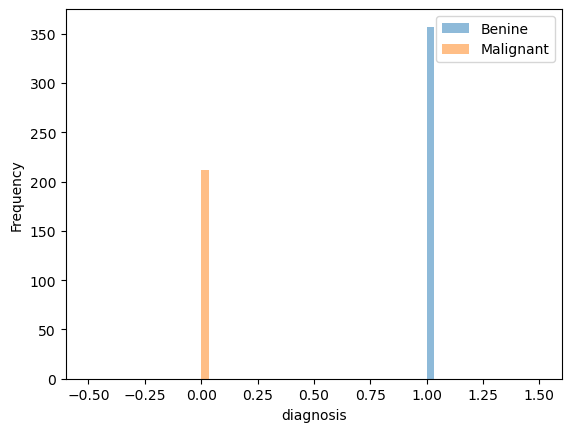

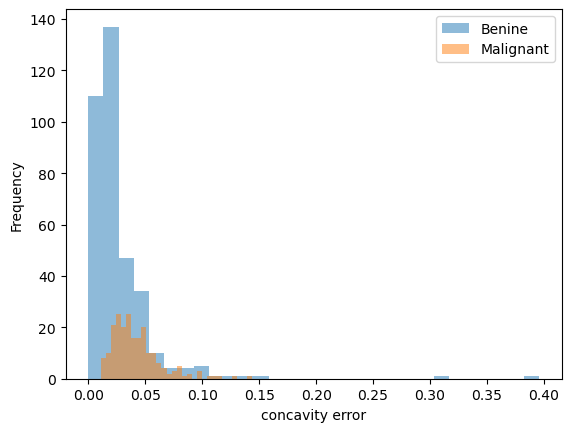

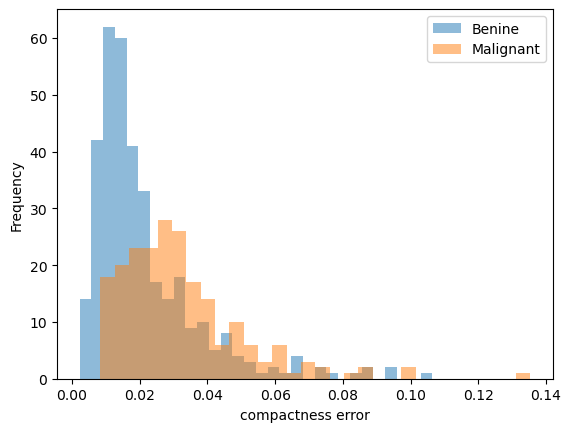

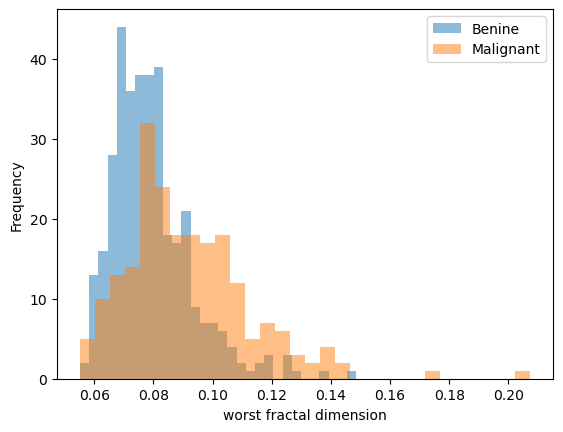

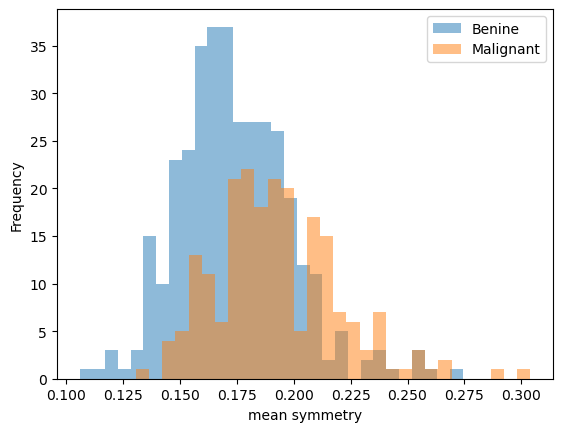

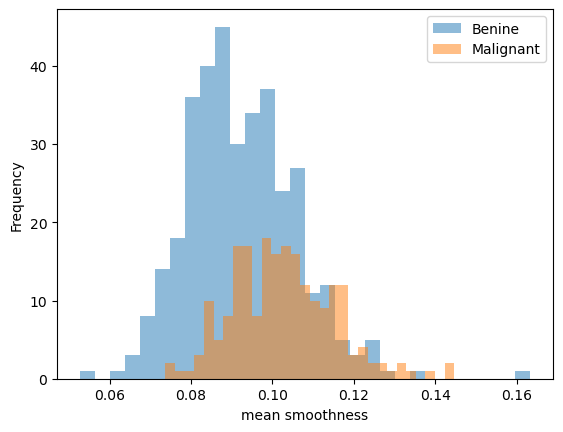

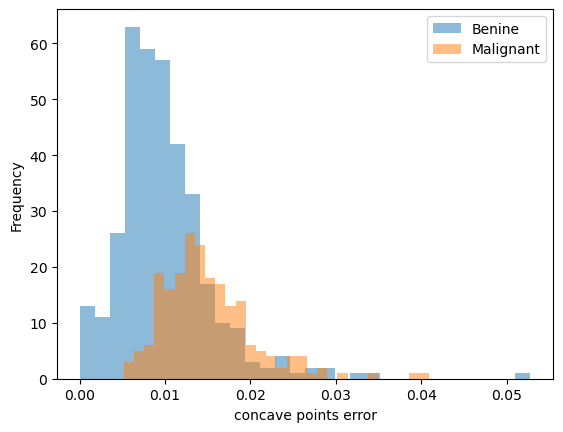

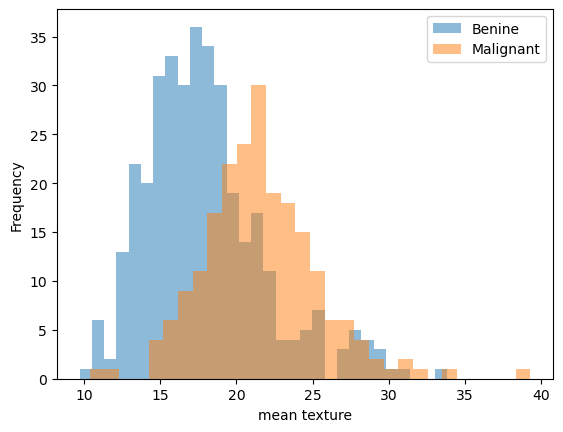

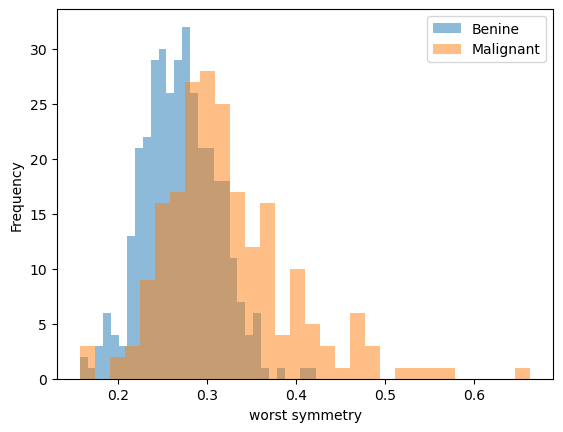

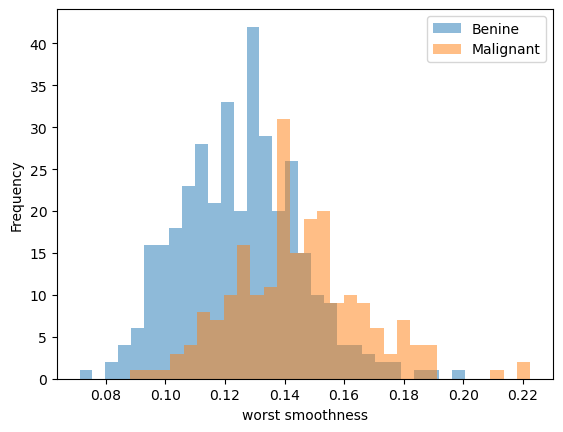

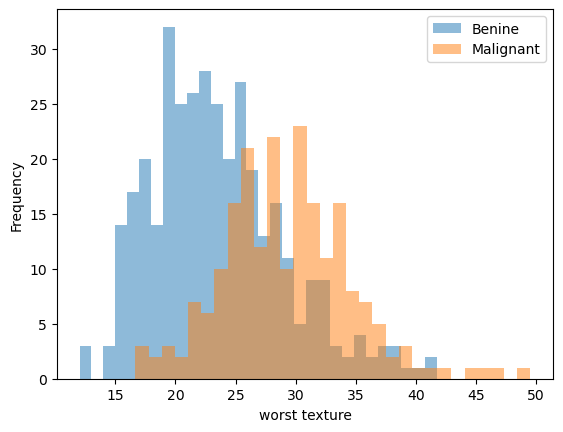

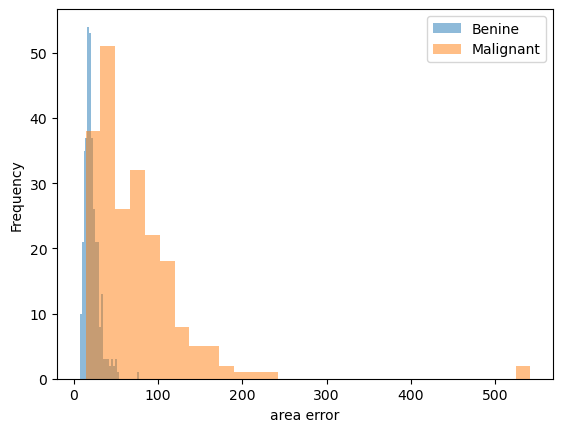

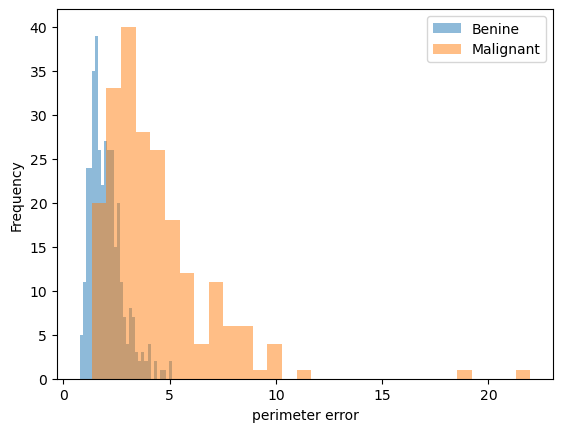

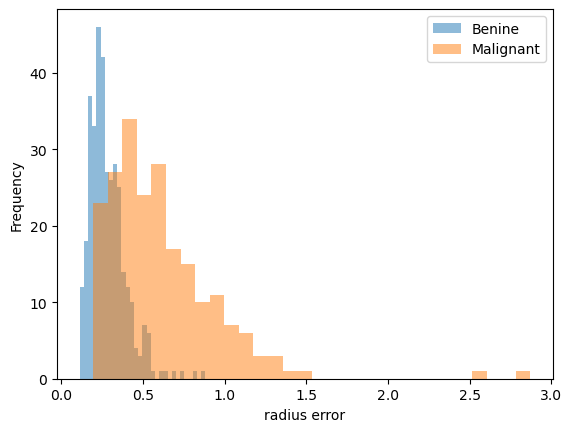

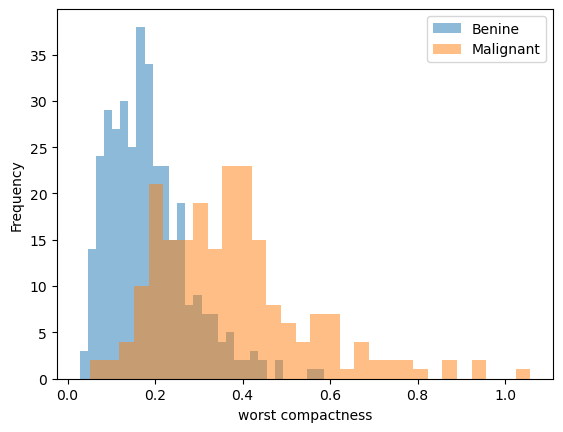

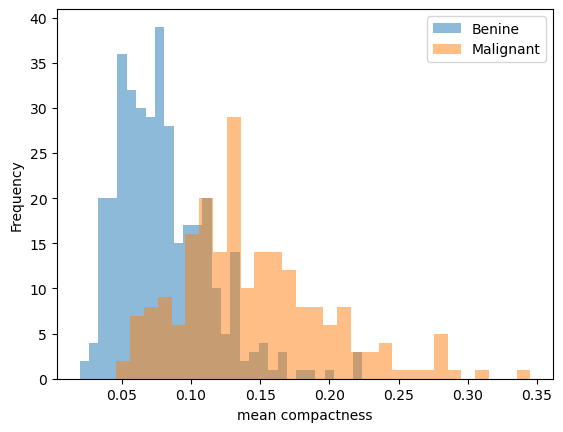

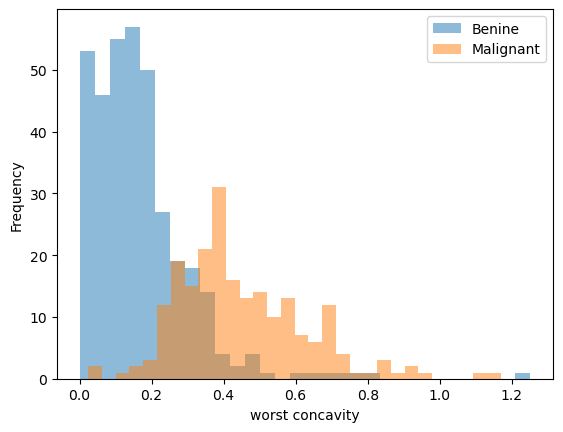

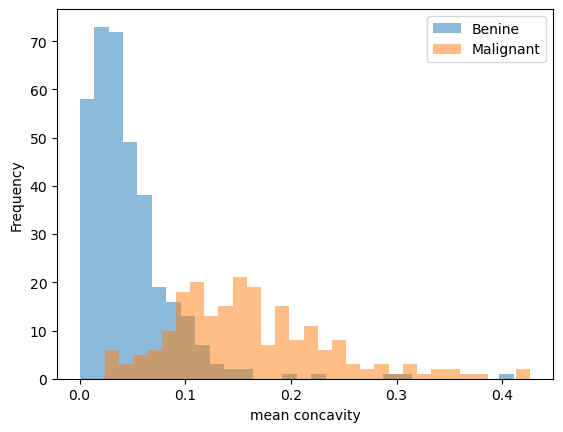

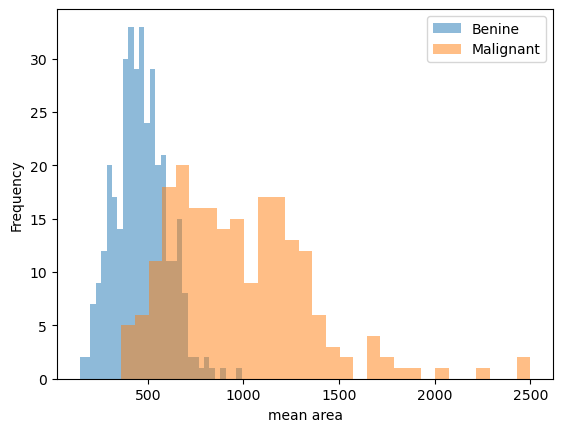

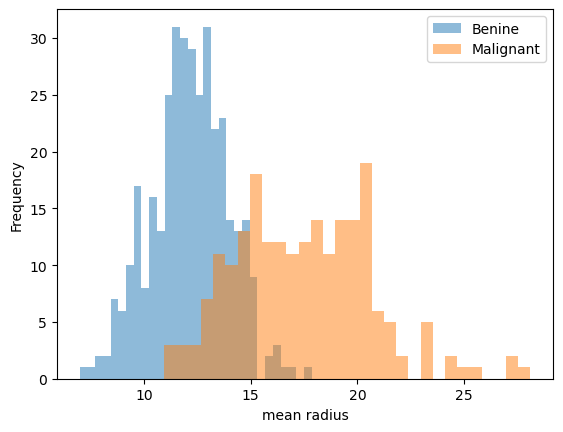

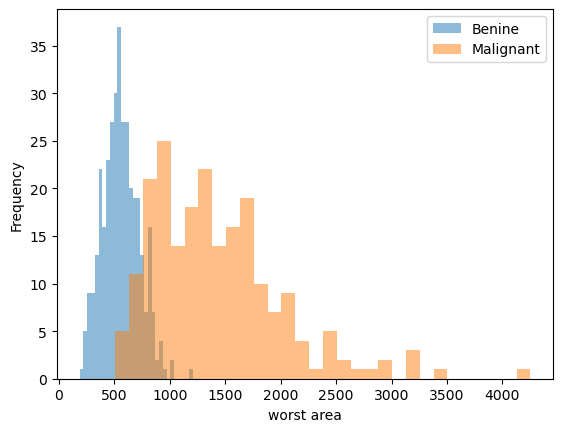

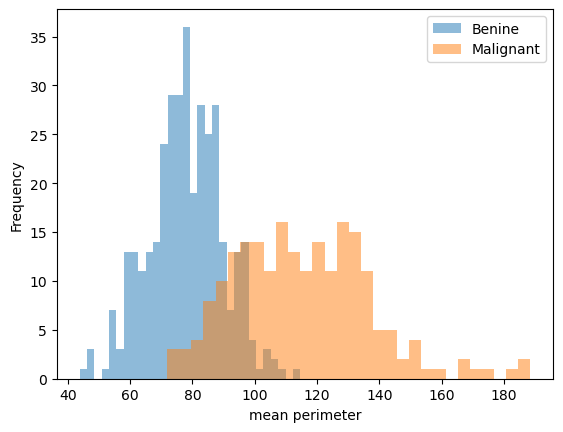

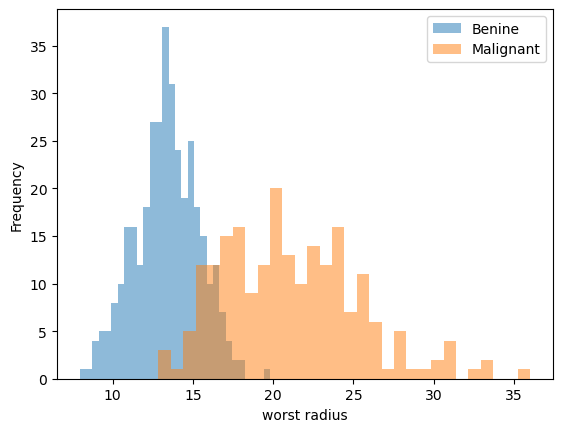

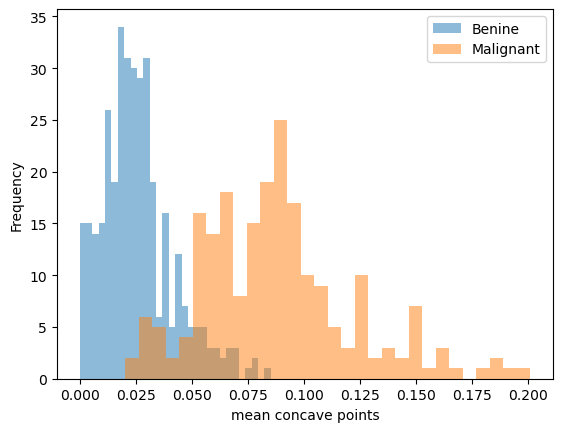

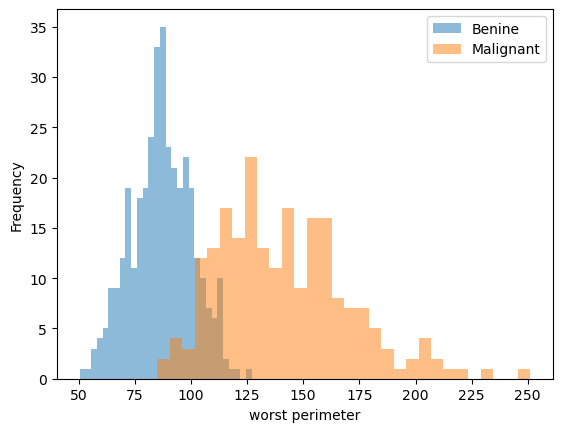

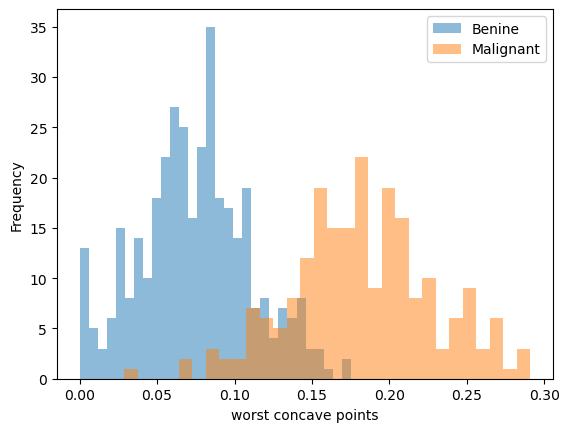

In [39]:
# visualise distribution of key features
# key features are stored in corr_features
not_harm = df[df['diagnosis'] == 1]
harm = df[df['diagnosis'] == 0]
for feature in corr_features:
    plt.figure()
    plt.hist(not_harm[feature], bins = 30, alpha = 0.5, label = "Benine")
    plt.hist(harm[feature], bins = 30, alpha = 0.5, label = "Malignant")
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()